In [1]:
import numpy as np
import pandas as pd

from xgboost import XGBRegressor
from xgboost import plot_importance

import time
import sys
import gc
import pickle

In [2]:
# Read data
data = pd.read_pickle(r'D:\Project\Pet_Project\Demand_Forecast\Data\data_2.pkl')

test = pd.read_pickle(r'D:\Project\Pet_Project\Demand_Forecast\Data\test.pkl')

In [3]:
data['shop_category'] = data['shop_category'].astype(np.int8)

In [4]:
data.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'city_code',
       'shop_category', 'item_category_id', 'type_code', 'subtype_code',
       'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'item_cnt_month_lag_4', 'item_cnt_month_lag_5', 'item_cnt_month_lag_6',
       'item_cnt_month_lag_12', 'date_avg_item_cnt_lag_1',
       'date_item_avg_item_cnt_lag_1', 'date_item_avg_item_cnt_lag_2',
       'date_item_avg_item_cnt_lag_3', 'date_item_avg_item_cnt_lag_6',
       'date_item_avg_item_cnt_lag_12', 'date_shop_avg_item_cnt_lag_1',
       'date_shop_avg_item_cnt_lag_2', 'date_shop_avg_item_cnt_lag_3',
       'date_shop_avg_item_cnt_lag_6', 'date_shop_avg_item_cnt_lag_12',
       'date_cat_avg_item_cnt_lag_1', 'date_shop_cat_avg_item_cnt_lag_1',
       'date_shop_type_avg_item_cnt_lag_1',
       'date_shop_subtype_avg_item_cnt_lag_1', 'date_city_avg_item_cnt_lag_1',
       'date_item_city_avg_item_cnt_lag_1', 'date_type_avg_item_cnt_lag_1',
  

In [5]:
# Select columns

data = data[[
    'date_block_num',
    'shop_id',
    'shop_category',
    'item_id',
    'item_cnt_month',
    'city_code',
    'item_category_id',
    'type_code',
    'subtype_code',
    'item_cnt_month_lag_1',
    'item_cnt_month_lag_2',
    'item_cnt_month_lag_3',
    # 'item_cnt_month_lag_4',
    # 'item_cnt_month_lag_5',
    'item_cnt_month_lag_6',
    'item_cnt_month_lag_12',
    'date_avg_item_cnt_lag_1',
    'date_item_avg_item_cnt_lag_1',
    'date_item_avg_item_cnt_lag_2',
    'date_item_avg_item_cnt_lag_3',
    'date_item_avg_item_cnt_lag_6',
    'date_item_avg_item_cnt_lag_12',
    'date_shop_avg_item_cnt_lag_1',
    'date_shop_avg_item_cnt_lag_2',
    'date_shop_avg_item_cnt_lag_3',
    'date_shop_avg_item_cnt_lag_6',
    'date_shop_avg_item_cnt_lag_12',
    'date_cat_avg_item_cnt_lag_1',
    'date_shop_cat_avg_item_cnt_lag_1',
    # 'date_shop_type_avg_item_cnt_lag_1',
    # 'date_shop_subtype_avg_item_cnt_lag_1',
    'date_city_avg_item_cnt_lag_1',
    'date_item_city_avg_item_cnt_lag_1',
    # 'date_type_avg_item_cnt_lag_1',
    # 'date_subtype_avg_item_cnt_lag_1',
    'delta_price_lag',
    'month',
    'days',
    'item_shop_last_sale',
    'item_last_sale',
    'item_shop_first_sale',
    'item_first_sale',
    'city_coord_1',
    'city_coord_2',
    'country_part'
]]

In [ ]:
data.info()

In [6]:
# Split data 
X_train = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = data[data.date_block_num < 33]['item_cnt_month']
X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = data[data.date_block_num == 33]['item_cnt_month']
X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [7]:
# Clean env
del data
gc.collect();

In [8]:
# Train

model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)

[0]	validation_0-rmse:1.05715	validation_1-rmse:1.04369
[1]	validation_0-rmse:0.96232	validation_1-rmse:0.97491
[2]	validation_0-rmse:0.91348	validation_1-rmse:0.94186
[3]	validation_0-rmse:0.88268	validation_1-rmse:0.92315
[4]	validation_0-rmse:0.86263	validation_1-rmse:0.91529
[5]	validation_0-rmse:0.84998	validation_1-rmse:0.91251
[6]	validation_0-rmse:0.84257	validation_1-rmse:0.90974
[7]	validation_0-rmse:0.83707	validation_1-rmse:0.90638
[8]	validation_0-rmse:0.83222	validation_1-rmse:0.90444
[9]	validation_0-rmse:0.82895	validation_1-rmse:0.90445
[10]	validation_0-rmse:0.82666	validation_1-rmse:0.90541
[11]	validation_0-rmse:0.82428	validation_1-rmse:0.90570
[12]	validation_0-rmse:0.82137	validation_1-rmse:0.90534
[13]	validation_0-rmse:0.81886	validation_1-rmse:0.90420
[14]	validation_0-rmse:0.81711	validation_1-rmse:0.90607
[15]	validation_0-rmse:0.81530	validation_1-rmse:0.90524
[16]	validation_0-rmse:0.81317	validation_1-rmse:0.90632
[17]	validation_0-rmse:0.81180	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.3, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=300, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=0.8, tree_method='approx', validate_parameters=1,
             verbosity=None)

<AxesSubplot:>

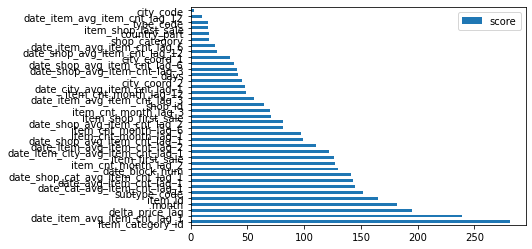

In [9]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')

In [10]:
Y_test = model.predict(X_test).clip(0, 20)

submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv(r'D:\Project\Pet_Project\Demand_Forecast\Results\xgb_new.csv', index=False)